# Collecte des données 

Pour analyser, l'impact des taux d'intérêts dans chaque secteur de l'économie, nous allons utiliser des ETFs réplicants chacun des secteurs de l'économie américaine : 

Pour obtenir les tickers des ETFs (Exchange Traded Funds) qui représentent chacun de ces secteurs de l'économie américaine, on peut généralement se référer à des ETFs populaires qui sont largement utilisés pour suivre la performance de ces secteurs spécifiques.

1. **Finance** - Financial Select Sector SPDR Fund (`XLF`)
2. **Medical** - Health Care Select Sector SPDR Fund (`XLV`)
3. **Computer and Technology** - Technology Select Sector SPDR Fund (`XLK`)
4. **Oils/Energy** - Energy Select Sector SPDR Fund (`XLE`)
5. **Business Services** - Pas d'ETF spécifique pour ce secteur; utilisez des ETFs généraux ou des indices comme le S&P 500.
6. **Retail/Wholesale** - SPDR S&P Retail ETF (`XRT`)
7. **Consumer Staples** - Consumer Staples Select Sector SPDR Fund (`XLP`)
8. **Basic Materials** - Materials Select Sector SPDR Fund (`XLB`)
9. **Industrial Products** - Industrial Select Sector SPDR Fund (`XLI`)
10. **Utilities** - Utilities Select Sector SPDR Fund (`XLU`)
11. **Consumer Discretionary** - Consumer Discretionary Select Sector SPDR Fund (`XLY`)
12. **Transportation** - iShares Transportation Average ETF (`IYT`)
13. **Construction** - Invesco Dynamic Building & Construction ETF (`PKB`)
14. **Aerospace** - iShares U.S. Aerospace & Defense ETF (`ITA`)
15. **Auto/Tires/Trucks** - First Trust NASDAQ Global Auto Index Fund (`CARZ`)
16. **Multi-Sector Conglomerates** - Ce secteur n'est pas spécifiquement couvert par un ETF standard.
17. **Unclassified** - Pas de ticker spécifique; ce terme est souvent utilisé pour les stocks ou secteurs non classifiés ailleurs.

Ces ETFs représentent une façon courante d'investir dans ces secteurs sans avoir à sélectionner des actions individuelles. Pour chaque secteur non couvert spécifiquement par un ETF, comme "Business Services" ou "Multi-Sector Conglomerates", vous pourriez envisager d'utiliser des indices plus larges ou de sélectionner des entreprises individuelles qui représentent bien ces secteurs. Pour les données les plus précises et les mises à jour, vous devriez vérifier chaque fonds sur une plateforme financière comme Yahoo Finance ou Bloomberg pour vous assurer que les tickers sont toujours actifs et représentatifs du secteur voulu.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFram

<Figure size 2160x1224 with 0 Axes>

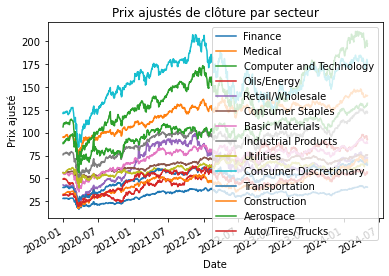

In [64]:
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
# Définir les tickers des ETF pour chaque secteur
sector_tickers = {
    "Finance": "XLF",
    "Medical": "XLV",
    "Computer and Technology": "XLK",
    "Oils/Energy": "XLE",
    "Retail/Wholesale": "XRT",
    "Consumer Staples": "XLP",
    "Basic Materials": "XLB",
    "Industrial Products": "XLI",
    "Utilities": "XLU",
    "Consumer Discretionary": "XLY",
    "Transportation": "IYT",
    "Construction": "PKB",
    "Aerospace": "ITA",
    "Auto/Tires/Trucks": "CARZ"
}

# Télécharger les données pour chaque ticker
data = {}
for sector, ticker in sector_tickers.items():
    try:
        # Téléchargement des données de prix ajustés de clôture
        data[sector] = yf.download(ticker, start="2020-01-01", end="2024-05-05")['Adj Close']
    except Exception as e:
        print(f"Échec du téléchargement pour {ticker}: {e}")

# Conversion en DataFrame
sector_data = pd.DataFrame(data)

# Vérification des données manquantes
print(sector_data.info())

# Téléchargement des données des taux d'intérêt de la FED
try:
    fed_rate = pd.read_excel('FEDFUNDS.xls')
    fed_rate['observation_date'] = pd.to_datetime(fed_rate['observation_date'])
    fed_rate.set_index('observation_date', inplace=True)
    fed_rate_selected = fed_rate.loc['2020-01-01':'2024-04-01']
except Exception as e:
    print(f"Échec du chargement des taux de la FED: {e}")

# Afficher les données de taux d'intérêt
print(fed_rate_selected.head())

# Graphiques
plt.figure(figsize=(30, 17))
sector_data.plot(title="Prix ajustés de clôture par secteur")
plt.ylabel("Prix ajusté")
plt.show()



In [66]:
# Calcul des variations des taux Fed Funds pour rendre les données stationnaires
fed_rate_diff = fed_rate_selected.pct_change().dropna()

# Éliminer les valeurs NaN qui peuvent exister après le calcul des rendements
#fed_rate_returns = fed_rate['Returns'].dropna()

# Application du test ADF
result = adfuller(fed_rate_diff)

# Impression des résultats
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interprétation du résultat basée sur la statistique ADF et la p-value
if result[1] < 0.05:
    print("Les rendements de la Fed sont stationnaires.")
else:
    print("Les rendements de la Fed ne sont pas stationnaires.")


ADF Statistic: -3.239067429708885
p-value: 0.01783178583497444
Critical Values:
	1%: -3.571
	5%: -2.923
	10%: -2.599
Les rendements de la Fed sont stationnaires.


In [68]:
for sector in monthly_returns.columns:
    # Application du test ADF
    result = adfuller(aligned_data[sector])
    # Impression des résultats
    print('ADF Statistic '+sector+': ', result[0])
    print('p-value '+sector+': ', result[1])
    print('Critical Values '+sector+': ')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    
    # Interprétation du résultat basée sur la statistique ADF et la p-value
    if result[1] < 0.05:
        print("Les rendements du secteur "+sector+ " sont stationnaires.")
    else:
        print("Les rendements du secteur "+sector+ " ne sont pas stationnaires.")

ADF Statistic Finance:  -5.234615088680818
p-value Finance:  7.468650639823454e-06
Critical Values Finance: 
	1%: -3.575
	5%: -2.924
	10%: -2.600
Les rendements du secteur Finance sont stationnaires.
ADF Statistic Medical:  -7.958420640251205
p-value Medical:  2.9936181972455525e-12
Critical Values Medical: 
	1%: -3.568
	5%: -2.921
	10%: -2.599
Les rendements du secteur Medical sont stationnaires.
ADF Statistic Computer and Technology:  -7.779717851598808
p-value Computer and Technology:  8.48105372690168e-12
Critical Values Computer and Technology: 
	1%: -3.568
	5%: -2.921
	10%: -2.599
Les rendements du secteur Computer and Technology sont stationnaires.
ADF Statistic Oils/Energy:  -7.364391311378687
p-value Oils/Energy:  9.318613501444374e-11
Critical Values Oils/Energy: 
	1%: -3.568
	5%: -2.921
	10%: -2.599
Les rendements du secteur Oils/Energy sont stationnaires.
ADF Statistic Retail/Wholesale:  -7.14311671741153
p-value Retail/Wholesale:  3.2848467305576137e-10
Critical Values Ret

# Analyse quantitative

Pour utiliser les données de rendements mensuels des secteurs et évaluer l'impact des taux de la FED, nous allons d'abord calculer ces rendements et ensuite les aligner avec les taux d'intérêt pour mener des analyses de régression

### Explications:

1. **Rendements Mensuels**: Calcul des rendements mensuels des secteurs à partir des données journalières. Cela standardise la périodicité pour l'analyse avec les taux de la FED.
2. **Alignement des Données**: Concaténation des rendements des secteurs avec les taux de la FED mensualisés, puis élimination des lignes avec des données manquantes.
3. **Régression Linéaire**: Utilisation de la régression OLS pour déterminer l'impact des taux de la FED sur les rendements sectoriels.
4. **Tests de Granger**: Évaluation de la causalité potentielle des taux de la FED sur les rendements sectoriels.
5. **Modèles GARCH**: Analyse de la volatilité des rendements sectoriels pour examiner comment la volatilité réagit aux changements dans les taux de la FED.


In [86]:
# Calcul de rendements mensuels pour les secteurs
monthly_returns = sector_data.resample('MS').ffill().pct_change()
# Alignement des données de rendements avec les taux
aligned_data = pd.concat([monthly_returns,fed_rate_diff], axis=1).dropna()

# Régression linéaire
X = sm.add_constant(aligned_data['FEDFUNDS'])  # Ajouter une constante à l'ensemble de données
results = {}
for sector in monthly_returns.columns:#sector_tickers.values():
    model = sm.OLS(aligned_data[sector], X,mising='drop').fit()
    results[sector] = model.summary()

# Afficher les résumés de régression
for sector, result in results.items():
    print(f"Résultats de régression pour {sector}:\n{result}\n\n")

C:\Users\jeanb\anaconda3\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['mising']
  warnings.warn(msg, ValueWarning)
C:\Users\jeanb\anaconda3\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['mising']
  warnings.warn(msg, ValueWarning)
C:\Users\jeanb\anaconda3\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['mising']
  warnings.warn(msg, ValueWarning)
C:\Users\jeanb\anaconda3\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['mising']
  warnings.warn(msg, ValueWarning)
C:\Users\jeanb\anaconda3\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['mising']
  warnings.warn(msg, ValueWarning)
C:\Users\jeanb\anaconda3\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['mising']
  warnings.warn(msg, ValueWarning)
C:\Users\jeanb\anaconda3\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['m

Résultats de régression pour Finance:
                            OLS Regression Results                            
Dep. Variable:                Finance   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.2020
Date:                Mon, 06 May 2024   Prob (F-statistic):              0.655
Time:                        17:09:04   Log-Likelihood:                 61.286
No. Observations:                  51   AIC:                            -118.6
Df Residuals:                      49   BIC:                            -114.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

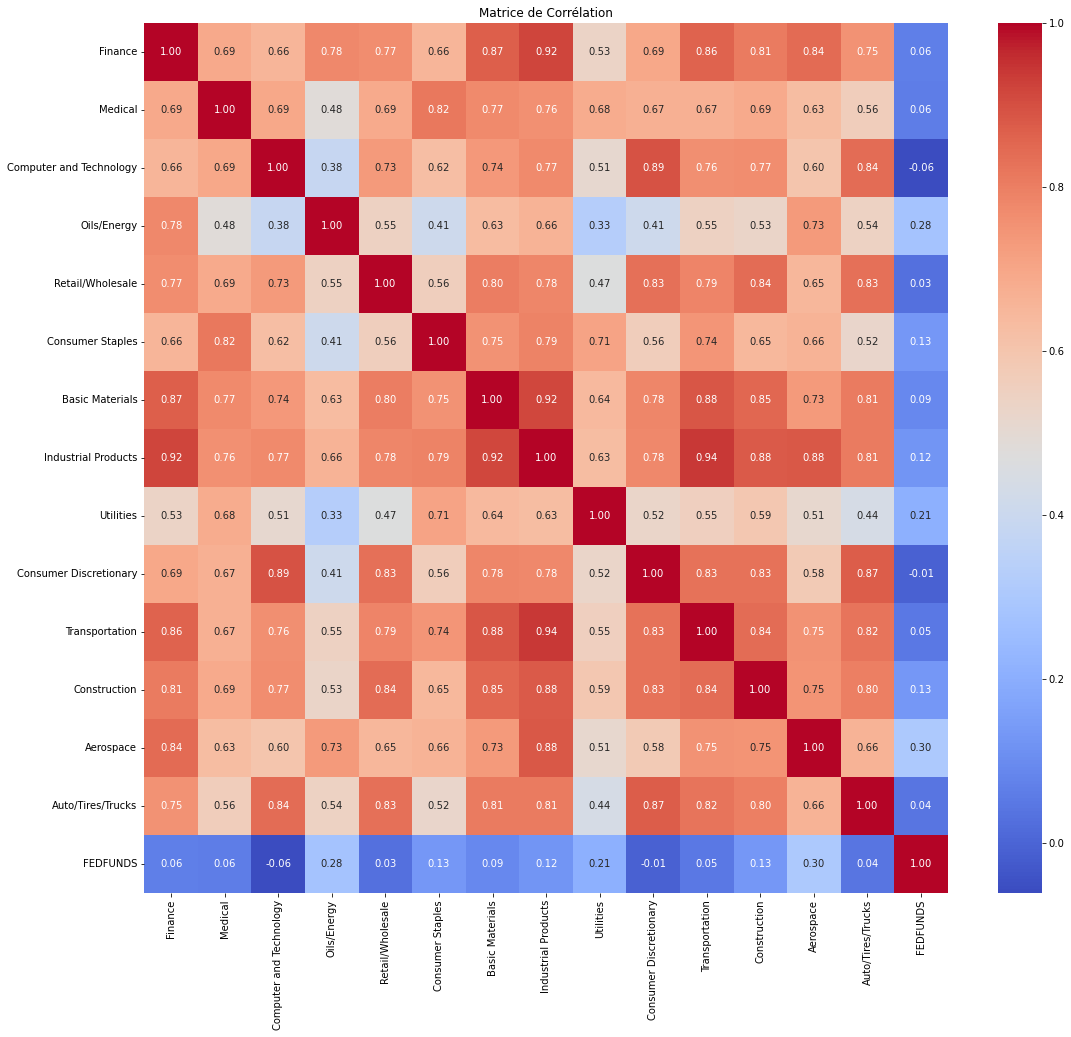

In [76]:
# Calcul de la matrice de corrélation
matriceCorrelation = np.corrcoef(aligned_data, rowvar=False)

# Ajustement de la taille de la figure
plt.figure(figsize=(18, 16))

# Création du heatmap avec seaborn
sns.heatmap(matriceCorrelation, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=aligned_data.columns, yticklabels=aligned_data.columns)

# Ajout d'un titre
plt.title('Matrice de Corrélation')

# Affichage de la figure
plt.show()

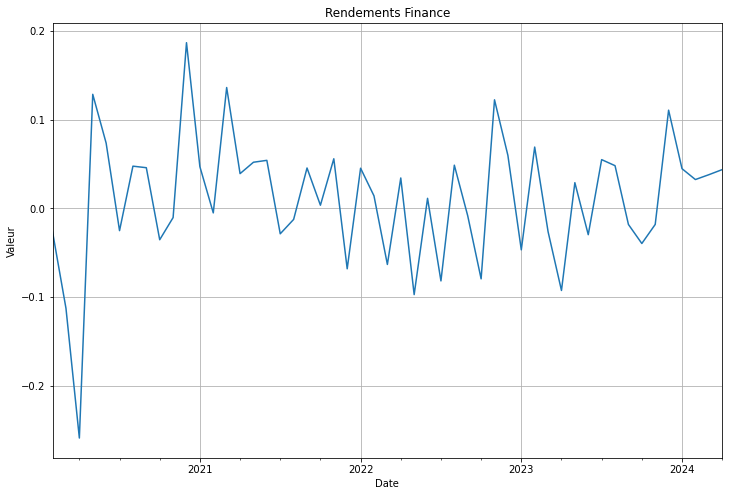

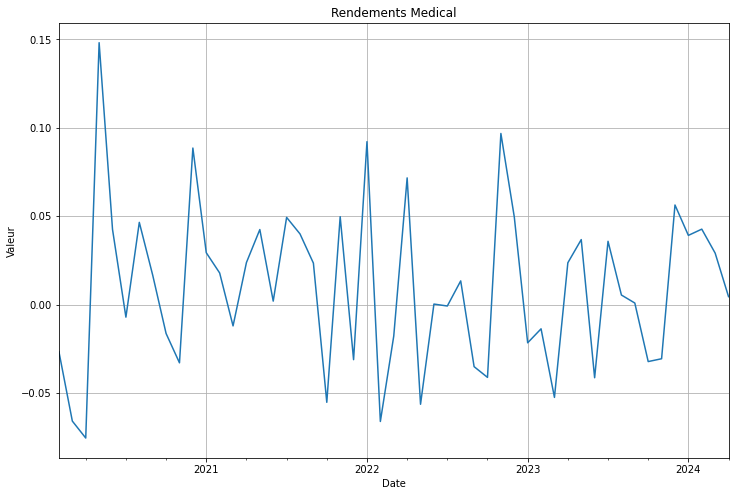

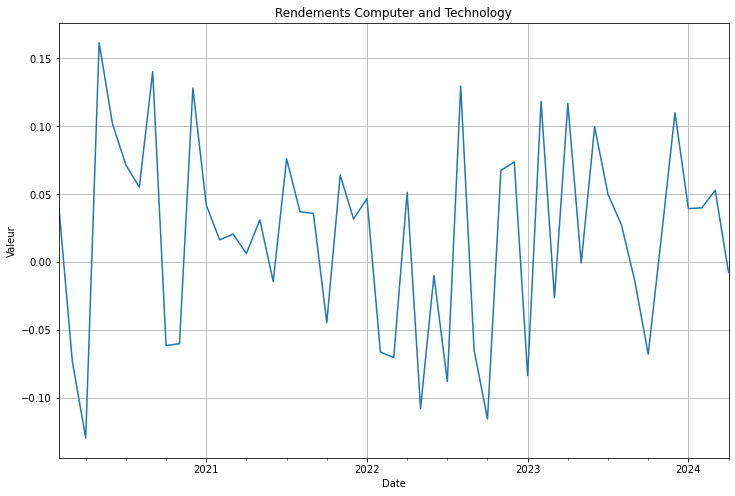

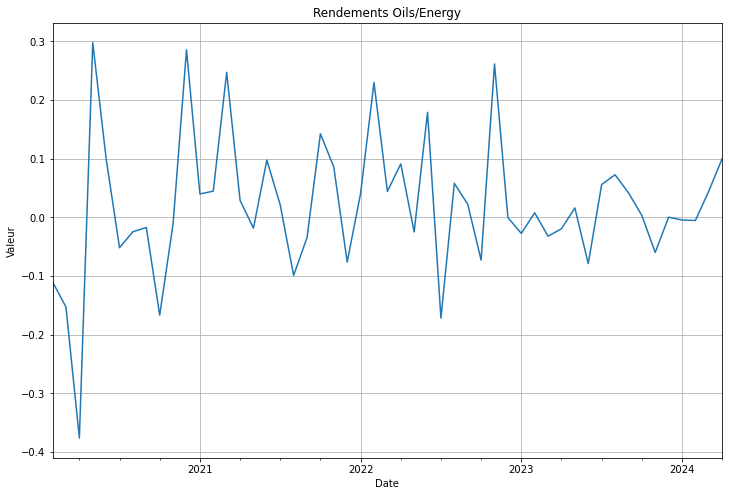

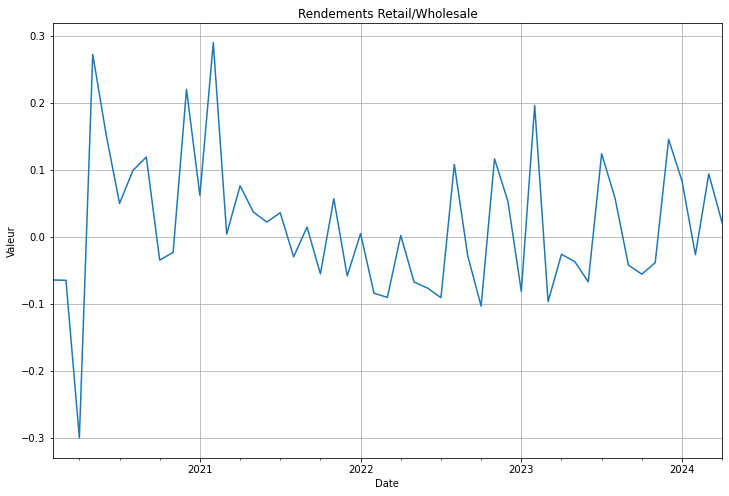

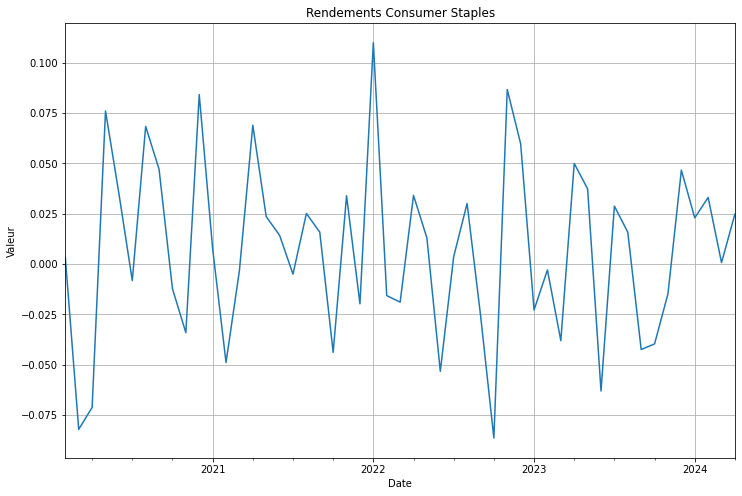

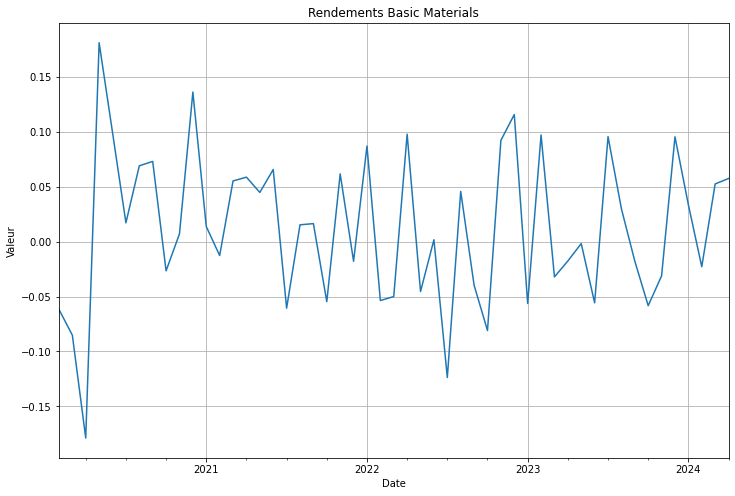

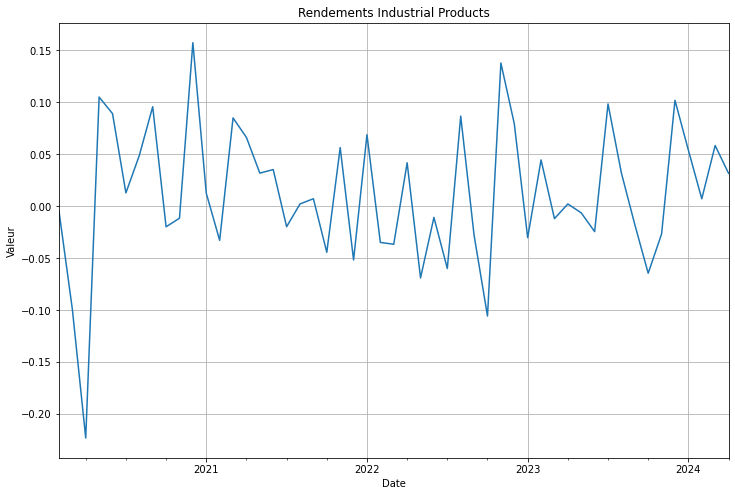

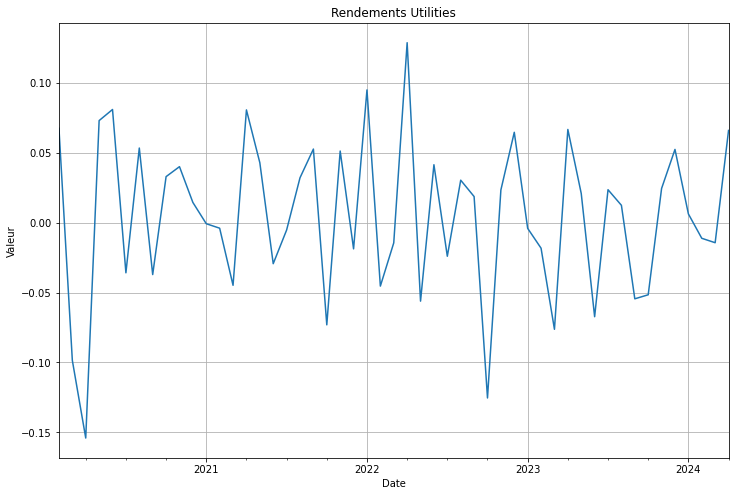

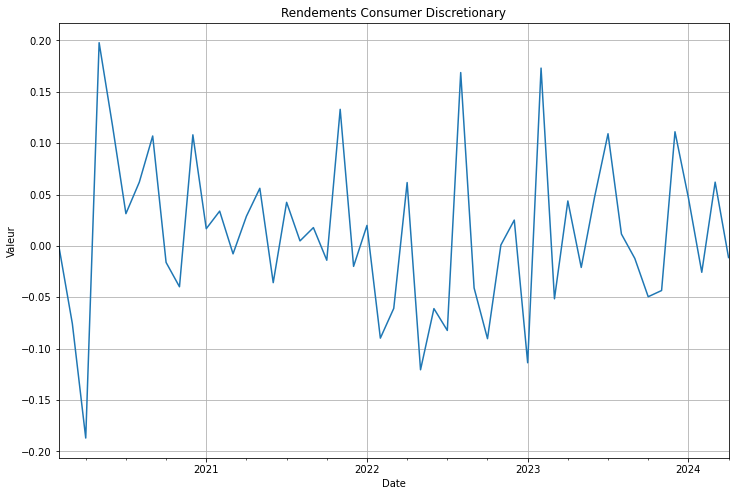

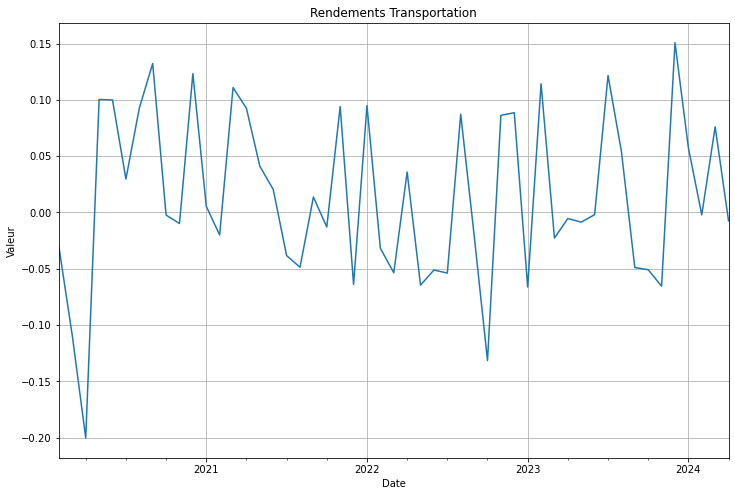

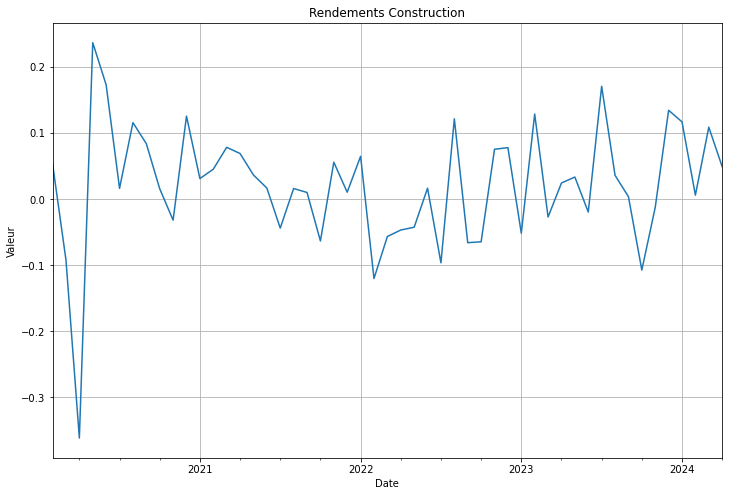

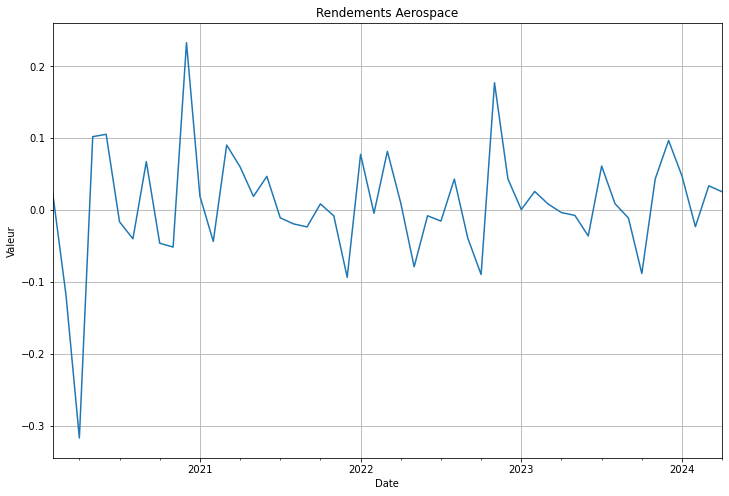

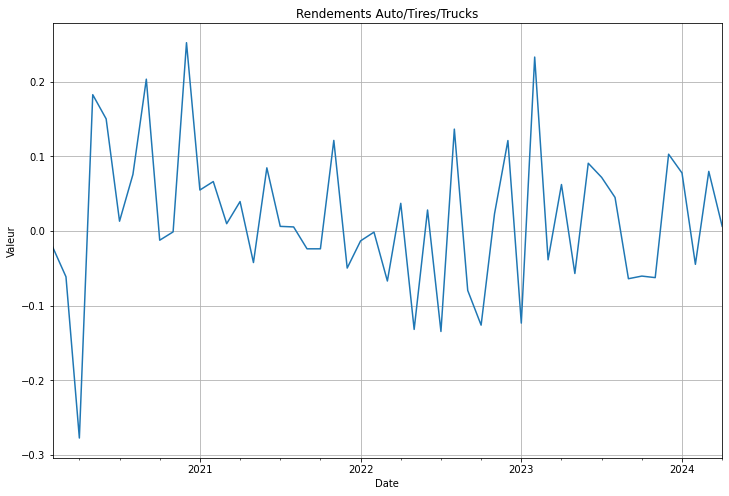

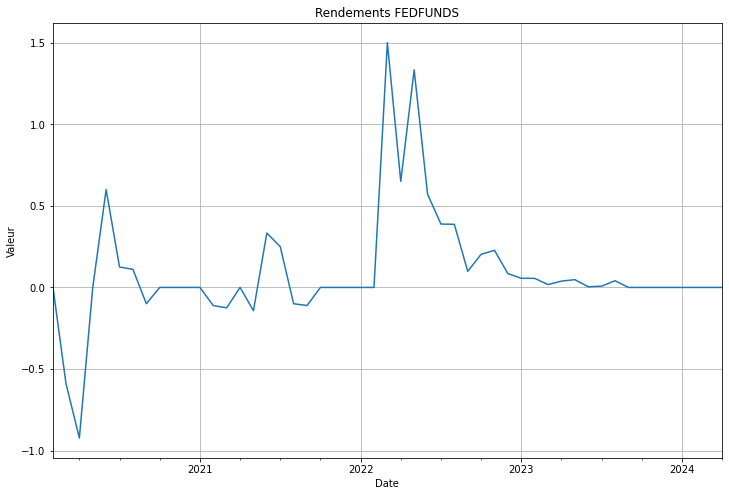

In [77]:
# Grahiques de chaque rendements
for sector in aligned_data.columns:
    aligned_data[sector].plot(figsize=(12, 8))
    plt.xlabel('Date')
    plt.ylabel('Valeur')
    plt.title('Rendements '+sector)
    plt.grid(True)
    plt.show()

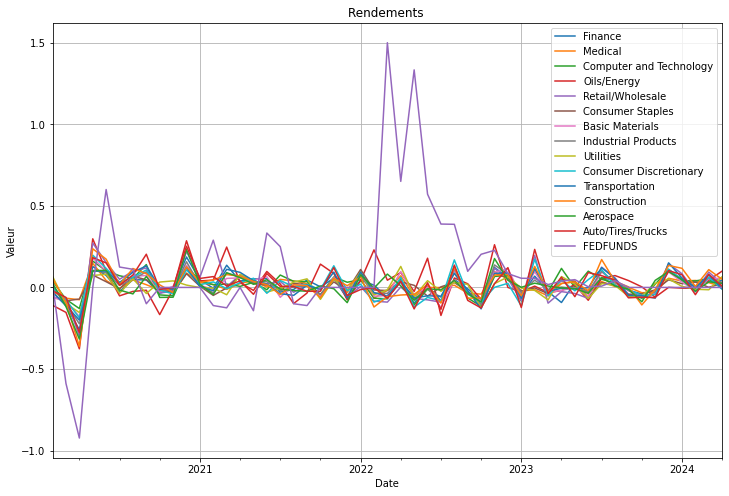

In [78]:
aligned_data.plot(figsize=(12, 8))
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.title('Rendements ')
plt.grid(True)
plt.show()

# 1. Tests de causalité de Granger
Ces tests permettent de déterminer si les taux d'intérêt peuvent prédire les rendements des secteurs.

Le test de Granger est une méthode statistique utilisée en économétrie pour déterminer si une série temporelle $ X $ peut être utilisée pour prédire une autre série temporelle $ Y $. Il est couramment utilisé pour examiner la causalité entre deux séries temporelles, en particulier dans le domaine de l'économie et de la finance.

Le test de Granger repose sur l'hypothèse selon laquelle si une série temporelle $ X $ est utile pour prédire une autre série temporelle $ Y $, alors les valeurs passées de $ X $ devraient fournir une information significative pour prédire les valeurs futures de $ Y $ au-delà de ce que les valeurs passées de $ Y $ peuvent fournir seules.

Le test de Granger est généralement effectué en deux étapes :

1. **Modélisation des données** : Les séries temporelles $ X $ et $ Y $ sont modélisées à l'aide d'un modèle de régression multivariée qui inclut les valeurs passées de $ X $ et de $ Y $ en tant que prédicteurs. Par exemple, si nous voulons tester si $$ X $$ Granger-causalise $ Y $, nous construirons un modèle de régression de la forme :

   $$
   Y_t = \alpha + \sum_{i=1}^{p} \beta_i Y_{t-i} + \sum_{j=1}^{q} \gamma_j X_{t-j} + \epsilon_t
   $$

   où $ \alpha $ est l'ordonnée à l'origine, $ \beta_i $ et $ \gamma_j $ sont les coefficients des valeurs passées de $ Y $ et de $ X $ respectivement, $ p $ et $ q $ sont les ordres du modèle pour les séries $ Y $ et $ X $, et $ \epsilon_t $ est le terme d'erreur.

2. **Test statistique** : Une fois que le modèle est estimé, un test statistique est utilisé pour évaluer si les coefficients associés aux valeurs passées de $ X $ sont statistiquement significatifs. Si les coefficients associés à $ X $ sont statistiquement significatifs, cela suggère que $ X $ Granger-cause $ Y $, c'est-à-dire que l'ajout des valeurs passées de $ X $ améliore significativement la capacité du modèle à prédire $ Y $.

Le test de Granger est souvent utilisé pour explorer les relations de causalité dans les séries temporelles économiques, telles que la relation entre l'inflation et la croissance économique, les taux d'intérêt et l'investissement, etc. Cependant, il est important de noter que la présence d'une corrélation entre deux séries temporelles ne garantit pas nécessairement une relation de causalité. D'autres facteurs et tests doivent également être pris en compte pour établir une relation causale robuste.

In [62]:
# Tests de Granger pour chaque secteur par rapport aux taux de la FED
granger_results = {}
print(sector_data.columns)
for sector in sector_data.columns:
    data_for_test = aligned_data[[sector, 'FEDFUNDS']].dropna()
    granger_result = grangercausalitytests(data_for_test, maxlag=4, verbose=False)
    granger_results[sector] = granger_result
    # Afficher un résumé simple pour chaque secteur
    print(f"Granger Causality results for {sector}:")
    for lag, result in granger_result.items():
        p_value = result[0]['ssr_chi2test'][1]
        print(f"  Lag {lag} p-value: {p_value:.4f}")

Index(['Finance', 'Medical', 'Computer and Technology', 'Oils/Energy',
       'Retail/Wholesale', 'Consumer Staples', 'Basic Materials',
       'Industrial Products', 'Utilities', 'Consumer Discretionary',
       'Transportation', 'Construction', 'Aerospace', 'Auto/Tires/Trucks'],
      dtype='object')
Granger Causality results for Finance:
  Lag 1 p-value: 0.9806
  Lag 2 p-value: 0.3668
  Lag 3 p-value: 0.0255
  Lag 4 p-value: 0.0634
Granger Causality results for Medical:
  Lag 1 p-value: 0.6077
  Lag 2 p-value: 0.7637
  Lag 3 p-value: 0.0092
  Lag 4 p-value: 0.1772
Granger Causality results for Computer and Technology:
  Lag 1 p-value: 0.6332
  Lag 2 p-value: 0.8840
  Lag 3 p-value: 0.0047
  Lag 4 p-value: 0.0608
Granger Causality results for Oils/Energy:
  Lag 1 p-value: 0.4617
  Lag 2 p-value: 0.0715
  Lag 3 p-value: 0.0291
  Lag 4 p-value: 0.0577
Granger Causality results for Retail/Wholesale:
  Lag 1 p-value: 0.7333
  Lag 2 p-value: 0.8845
  Lag 3 p-value: 0.0074
  Lag 4 p-value:

C:\Users\jeanb\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\jeanb\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\jeanb\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\jeanb\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\jeanb\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\jeanb\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions shou

# 2. Analyse de la volatilité avec des modèles GARCH
L'analyse de la volatilité avec des modèles GARCH peut montrer comment la volatilité du secteur réagit aux changements de politique monétaire.


Le modèle GARCH( p , q ) pour une série temporelle $ y_t $ est défini comme suit :

$$ y_t = \mu_t + \epsilon_t $$
$$ \epsilon_t = \sigma_t \cdot z_t $$

Où :
- $ \mu_t $ est la moyenne conditionnelle de la série temporelle à un moment $ t $.
- $ \epsilon_t $ est le résidu à un moment $ t $.
- $ \sigma_t $ est la racine carrée de la variance conditionnelle de $ \epsilon_t $, c'est-à-dire la volatilité conditionnelle à un moment $ t $.
- $ z_t $ est une variable aléatoire standardisée qui suit une distribution normale centrée réduite.

La volatilité conditionnelle $ \sigma_t^2 $ est modélisée comme une combinaison linéaire de ses valeurs passées et des carrés de ses résidus passés, selon la forme générale :

$$ \sigma_t^2 = \omega + \sum_{i=1}^{p} \alpha_i \cdot \epsilon_{t-i}^2 + \sum_{j=1}^{q} \beta_j \cdot \sigma_{t-j}^2 $$

Où :
- $ \omega $ est la constante.
- $ \alpha_i $ sont les coefficients des résidus au carré.
- $ \beta_j $ sont les coefficients des valeurs passées de la volatilité.

En résumé, le modèle GARCH est un modèle où la variance conditionnelle est modélisée comme une fonction linéaire de ses propres valeurs passées et des carrés de ses résidus passés. Les paramètres du modèle $ \omega $, $ \alpha $ et $ \beta $ sont estimés à l'aide de méthodes d'estimation statistique telles que la méthode des moindres carrés ordinaires (MCO) ou la méthode du maximum de vraisemblance. Une fois que les paramètres sont estimés, le modèle peut être utilisé pour prédire la volatilité future de la série temporelle.

In [58]:
# Modèles GARCH pour chaque secteur
garch_results = {}
for sector in sector_data.columns:
    returns = aligned_data[sector].dropna()
    model = arch_model(returns, vol='Garch', p=1, q=1)
    garch_fitted = model.fit(disp='off')
    garch_results[sector] = garch_fitted
    print(f"GARCH model results for {sector}:\n{garch_fitted.summary()}\n")

C:\Users\jeanb\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.005315. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\jeanb\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002165. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\jeanb\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScal

GARCH model results for Finance:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Finance   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                65.1061
Distribution:                  Normal   AIC:                          -122.212
Method:            Maximum Likelihood   BIC:                          -114.485
                                        No. Observations:                   51
Date:                Mon, May 06 2024   Df Residuals:                       50
Time:                        15:09:43   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0126 

C:\Users\jeanb\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.004945. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\jeanb\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.004528. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\jeanb\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScal

GARCH model results for Industrial Products:
                      Constant Mean - GARCH Model Results                      
Dep. Variable:     Industrial Products   R-squared:                       0.000
Mean Model:              Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       GARCH   Log-Likelihood:                67.6779
Distribution:                   Normal   AIC:                          -127.356
Method:             Maximum Likelihood   BIC:                          -119.628
                                         No. Observations:                   51
Date:                 Mon, May 06 2024   Df Residuals:                       50
Time:                         15:09:44   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
m

C:\Users\jeanb\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.009767. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


# 3. Modèles ARIMA pour la prédiction
Utilisation du modèle ARIMA pour prédire l'impact futur des changements des taux sur les indices sectoriels.

Le modèle ARIMA, qui signifie "AutoRegressive Integrated Moving Average", est un modèle statistique utilisé pour modéliser et prévoir les séries temporelles. Il combine les composantes d'autorégression (AR), de moyenne mobile (MA) et d'intégration (I) pour capturer les tendances, les structures de dépendance et les modèles saisonniers des données temporelles.

Voici une explication détaillée de chaque composante :

1. **Composante AR (AutoRegressive)** :
   - L'autorégression fait référence à la régression d'une variable sur ses valeurs passées. Dans un modèle ARIMA, la composante AR représente la relation linéaire entre la variable dépendante et ses propres valeurs retardées. 
   - La notation AR(p) indique qu'il y a p termes AR dans le modèle, ce qui signifie que la valeur actuelle de la série temporelle dépend des p valeurs précédentes.

2. **Composante MA (Moving Average)** :
   - La moyenne mobile est une moyenne des erreurs de prédiction sur une période de temps donnée. Dans un modèle ARIMA, la composante MA représente la dépendance linéaire entre la variable dépendante et les termes d'erreur de ses valeurs retardées.
   - La notation MA(q) indique qu'il y a q termes MA dans le modèle, ce qui signifie que la valeur actuelle de la série temporelle dépend des q erreurs de prédiction précédentes.

3. **Composante I (Integrated)** :
   - L'intégration est utilisée pour rendre la série temporelle stationnaire en différenciant la série à un certain ordre. Cela peut être nécessaire lorsque la série temporelle présente une tendance ou une saisonnalité non stationnaire.
   - La notation I(d) indique qu'il y a eu d différences pour rendre la série temporelle stationnaire.

En combinant ces trois composantes, un modèle ARIMA peut être écrit comme ARIMA(p, d, q), où :
- p est l'ordre de la composante AR.
- d est l'ordre de différenciation.
- q est l'ordre de la composante MA.

Le processus de construction d'un modèle ARIMA implique généralement les étapes suivantes :
1. Identification : Identifier les ordres p, d et q en examinant les graphiques de la série temporelle et les fonctions d'autocorrélation partielle et d'autocorrélation.
2. Estimation : Estimer les paramètres du modèle à l'aide de méthodes telles que la méthode des moindres carrés ordinaires (MCO) ou la méthode du maximum de vraisemblance.
3. Diagnostic : Tester la qualité du modèle en vérifiant si les résidus sont stationnaires et si le modèle est capable de capturer les structures temporelles de la série.
4. Prévision : Utiliser le modèle pour faire des prévisions sur les valeurs futures de la série temporelle.

En résumé, le modèle ARIMA est un outil puissant pour modéliser et prévoir les séries temporelles en capturant les tendances, les structures de dépendance et les modèles saisonniers des données.

1. **Composante AR (AutoRegressive)** :
   - La composante AR d'ordre p est donnée par l'équation :
     $ X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + ... + \phi_p X_{t-p} + \varepsilon_t $
     où $ X_t $ est la série temporelle à l'instant t,
     $ c $ est la constante,
     $ \phi_1, \phi_2, ..., \phi_p $ sont les coefficients AR,
     $ \varepsilon_t $ est le terme d'erreur blanc à l'instant t.

2. **Composante MA (Moving Average)** :
   - La composante MA d'ordre q est donnée par l'équation :
     $$ X_t = c + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + ... + \theta_q \varepsilon_{t-q} $$
     où $ \theta_1, \theta_2, ..., \theta_q $ sont les coefficients MA.

3. **Composante I (Integrated)** :
   - La composante intégrée est utilisée pour rendre la série temporelle stationnaire en différenciant la série. Si on différencie la série une fois (d=1), on obtient :
     $$ Y_t = X_t - X_{t-1} $$
   - Si on différencie la série d fois (d=d), on obtient :
     $$ Y_t = (1 - B)^d X_t $$
     où $ B $ est l'opérateur de retard, tel que $ B^d X_t = X_{t-d} $.

Ainsi, un modèle ARIMA(p, d, q) peut être écrit mathématiquement comme suit :
$$ Y_t = c + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + ... + \phi_p Y_{t-p} + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + ... + \theta_q \varepsilon_{t-q} + \varepsilon_t $$

Après estimation des coefficients, ce modèle peut être utilisé pour faire des prévisions sur les valeurs futures de la série temporelle $ X_t $.
rie temporelle \( X_t \).

In [85]:
for sector in sector_data.columns:
    # Modélisation ARIMA sur les retours du secteur
    model = ARIMA(aligned_data[sector], order=(1, 1, 1))  # Modèle ARIMA(1,1,1)
    fitted_model = model.fit()
    
    # Prévisions futures
    forecast = fitted_model.forecast(steps=12)  # Prévoir les 12 prochains mois
    print("Prévisions des rendements du secteur "+sector)
    print(forecast)


Prévisions des rendements du secteur Finance
2024-05-01    0.010494
2024-06-01    0.010526
2024-07-01    0.010526
2024-08-01    0.010526
2024-09-01    0.010526
2024-10-01    0.010526
2024-11-01    0.010526
2024-12-01    0.010526
2025-01-01    0.010526
2025-02-01    0.010526
2025-03-01    0.010526
2025-04-01    0.010526
Freq: MS, Name: predicted_mean, dtype: float64
Prévisions des rendements du secteur Medical
2024-05-01    0.010206
2024-06-01    0.009558
2024-07-01    0.009632
2024-08-01    0.009624
2024-09-01    0.009625
2024-10-01    0.009624
2024-11-01    0.009624
2024-12-01    0.009624
2025-01-01    0.009624
2025-02-01    0.009624
2025-03-01    0.009624
2025-04-01    0.009624
Freq: MS, Name: predicted_mean, dtype: float64
Prévisions des rendements du secteur Computer and Technology
2024-05-01    0.022236
2024-06-01    0.019375
2024-07-01    0.019651
2024-08-01    0.019625
2024-09-01    0.019627
2024-10-01    0.019627
2024-11-01    0.019627
2024-12-01    0.019627
2025-01-01    0.019

C:\Users\jeanb\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prévisions des rendements du secteur Consumer Discretionary
2024-05-01    0.014113
2024-06-01    0.010809
2024-07-01    0.011238
2024-08-01    0.011182
2024-09-01    0.011189
2024-10-01    0.011189
2024-11-01    0.011189
2024-12-01    0.011189
2025-01-01    0.011189
2025-02-01    0.011189
2025-03-01    0.011189
2025-04-01    0.011189
Freq: MS, Name: predicted_mean, dtype: float64
Prévisions des rendements du secteur Transportation
2024-05-01    0.012763
2024-06-01    0.013604
2024-07-01    0.013639
2024-08-01    0.013640
2024-09-01    0.013640
2024-10-01    0.013640
2024-11-01    0.013640
2024-12-01    0.013640
2025-01-01    0.013640
2025-02-01    0.013640
2025-03-01    0.013640
2025-04-01    0.013640
Freq: MS, Name: predicted_mean, dtype: float64
Prévisions des rendements du secteur Construction
2024-05-01    0.020484
2024-06-01    0.020867
2024-07-01    0.020862
2024-08-01    0.020862
2024-09-01    0.020862
2024-10-01    0.020862
2024-11-01    0.020862
2024-12-01    0.020862
2025-01-

## Intégration du modèle VAR
Le modèle VAR est utilisé pour capturer les relations linéaires interdépendantes entre plusieurs séries temporelles. C'est particulièrement utile pour étudier les dynamiques sectorielles en réponse aux changements de politique monétaire.

In [91]:
from statsmodels.tsa.api import VAR

# Préparation des données pour le modèle VAR
# Assurez-vous que toutes les colonnes sont des types float et gérer les valeurs manquantes
aligned_data = aligned_data.dropna().astype(float)

# Création du modèle VAR
var_model = VAR(aligned_data)
var_results = var_model.fit(maxlags=2, ic='aic')  # Déterminer automatiquement l'ordre du lag

# Afficher le résumé du modèle VAR
print(var_results.summary())

# Prévisions avec le modèle VAR
var_forecast = var_results.forecast(aligned_data.values[-var_results.k_ar:], steps=12)  # Prévisions pour les 12 prochains mois

# Convertir les prévisions en DataFrame pour une meilleure lisibilité
var_forecast_df = pd.DataFrame(var_forecast, columns=aligned_data.columns)
print(var_forecast_df)

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 06, May, 2024
Time:                     17:29:28
--------------------------------------------------------------------
No. of Equations:         15.0000    BIC:                   -83.9039
Nobs:                     49.0000    HQIC:                  -95.0455
Log likelihood:           1917.57    FPE:                1.73240e-43
AIC:                     -101.857    Det(Omega_mle):     1.10978e-46
--------------------------------------------------------------------
Results for equation Finance
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
const                              0.015598         0.017502            0.891           0.373
L1.Finance                         0.077769         0.721337            0.108           0.914
L1.Med

In [89]:
# Nombre de simulations
num_simulations = 1000
forecast_horizon = 12  # 12 mois

# Stockage des simulations
monte_carlo_simulations = np.zeros((num_simulations, forecast_horizon, len(aligned_data.columns)))

# Effectuer les simulations de Monte Carlo
for n in range(num_simulations):
    for i in range(forecast_horizon):
        if i == 0:
            monte_carlo_simulations[n, i, :] = aligned_data.iloc[-1] + np.random.normal(size=(len(aligned_data.columns),))
        else:
            monte_carlo_simulations[n, i, :] = monte_carlo_simulations[n, i-1, :] + np.random.normal(size=(len(aligned_data.columns),))

# Calculer la moyenne et l'écart type des simulations
mean_forecast = monte_carlo_simulations.mean(axis=0)
std_dev_forecast = monte_carlo_simulations.std(axis=0)

# Affichage des résultats
print("Moyenne des prévisions de Monte Carlo:")
print(mean_forecast)
print("Écart type des prévisions de Monte Carlo:")
print(std_dev_forecast)


Moyenne des prévisions de Monte Carlo:
[[ 0.03948406  0.04756278 -0.05851712  0.04729181  0.0313035   0.01426558
   0.07410657  0.04724028  0.07204155 -0.04312628 -0.01959364  0.04831978
   0.0576238   0.09335314  0.01399545]
 [ 0.06756326  0.03816885 -0.08866708  0.0443448  -0.00700744 -0.00807578
   0.07440025  0.01608493  0.08594497 -0.09600452  0.00236903  0.05442006
   0.06660868  0.11345946  0.03917978]
 [ 0.03960616 -0.00706254 -0.09514097  0.05133759 -0.05277149 -0.0083929
   0.15090777 -0.04266702  0.07591393 -0.11267079 -0.01627041  0.03373804
   0.06824542  0.10447085  0.02923998]
 [ 0.02703134  0.04035418 -0.09983017  0.05104576 -0.04287074 -0.03714798
   0.14593227 -0.04359694  0.09474835 -0.16480047  0.02485452 -0.00437394
   0.11018208  0.1574519   0.0152465 ]
 [ 0.07474623 -0.01704758 -0.04496868  0.04958061 -0.0115468  -0.09086139
   0.18291274 -0.04644554  0.12485385 -0.17869212  0.04372917 -0.01388958
   0.11826235  0.12817786  0.0357033 ]
 [ 0.04657106 -0.07497777 -

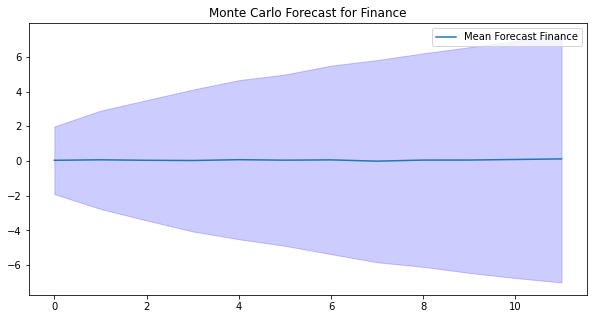

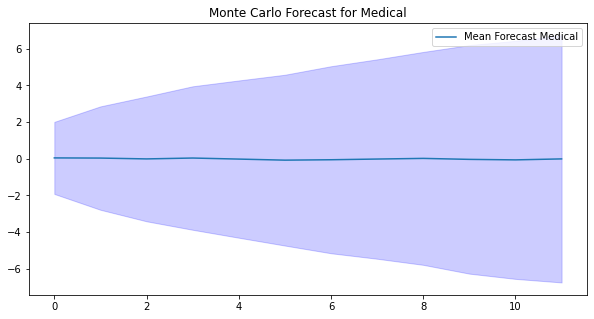

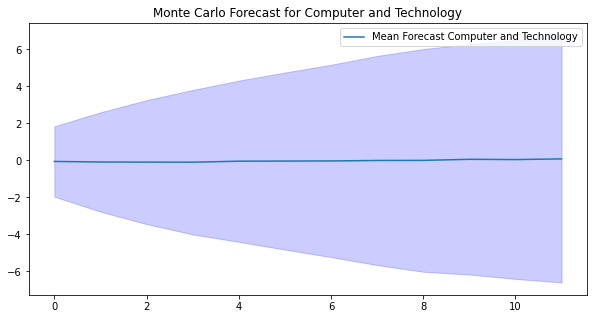

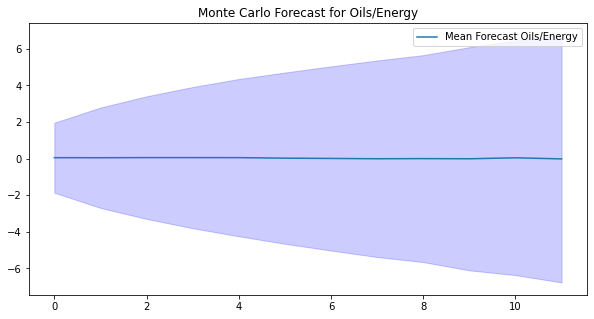

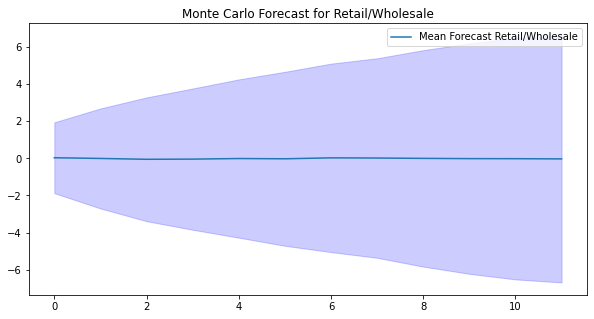

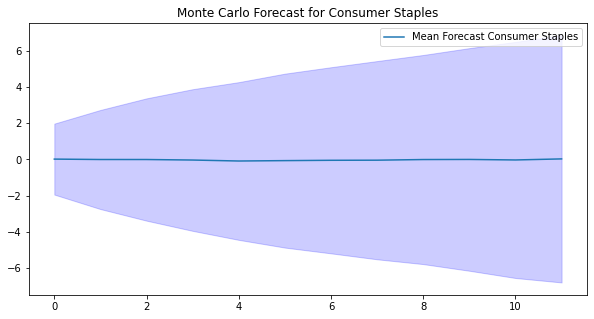

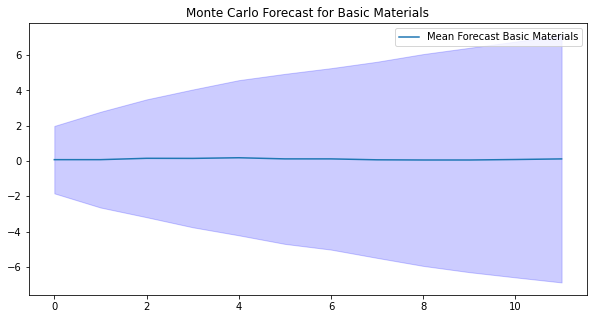

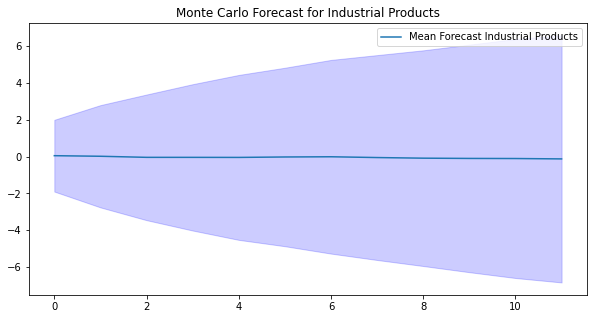

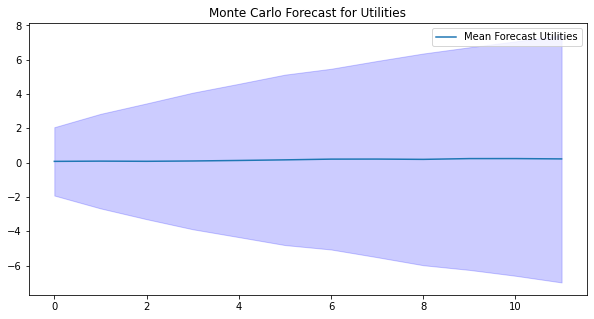

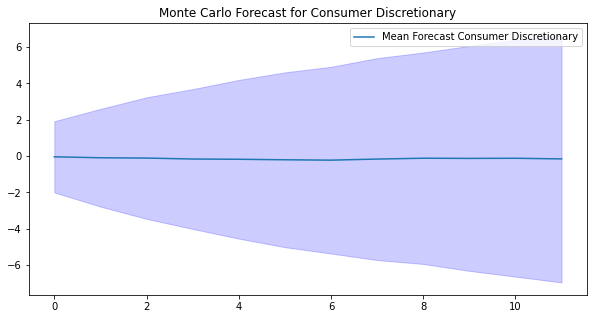

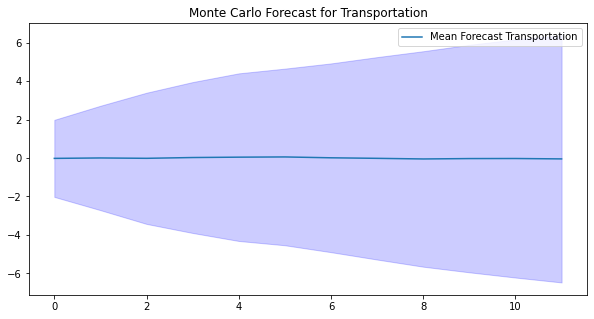

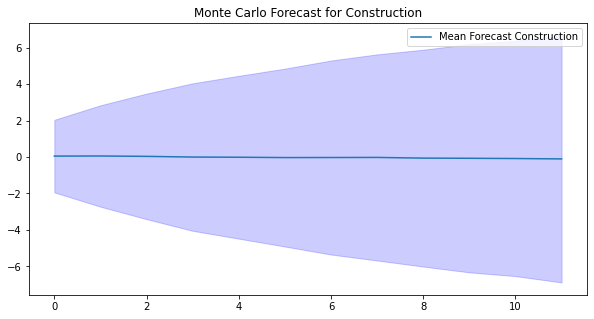

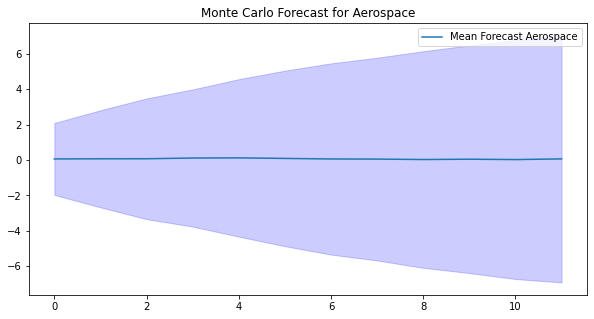

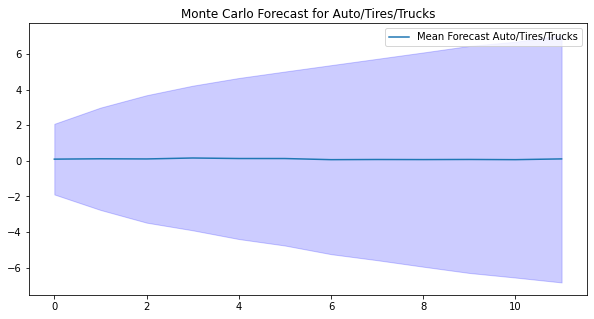

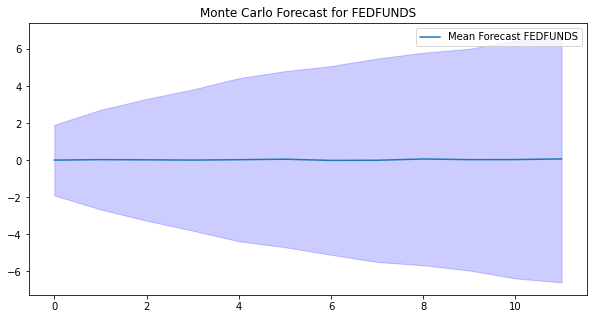

In [90]:

# Plots pour chaque secteur
for idx, sector in enumerate(aligned_data.columns):
    plt.figure(figsize=(10, 5))
    plt.plot(mean_forecast[:, idx], label=f'Mean Forecast {sector}')
    plt.fill_between(range(forecast_horizon), 
                     mean_forecast[:, idx] - 1.96 * std_dev_forecast[:, idx], 
                     mean_forecast[:, idx] + 1.96 * std_dev_forecast[:, idx], color='b', alpha=0.2)
    plt.title(f'Monte Carlo Forecast for {sector}')
    plt.legend()
    plt.show()
